# AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [45]:
import pandas as pd

In [46]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [47]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [48]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [49]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [50]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [51]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [52]:
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60,21.349599,44.235978
1,11020,9306020,19715322.61,21.012462,44.516072
2,11030,8514380,14707082.87,21.364786,36.903883
3,11040,8887140,17449273.95,21.740324,42.685596
4,11050,8625540,17947278.99,22.474283,46.762548


In [53]:
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8', thousands=',')

In [54]:
df_seoul_business.head()

,자치구,동,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,종로구,소계,5912,3613,1413
1,중구,소계,6414,3542,982
2,용산구,소계,2987,2076,1332
3,성동구,소계,2785,1859,621
4,광진구,소계,2861,1887,1577


In [55]:
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [56]:
df_seoul_people.head()

,자치구,남자,여자,계
0,합계,4716704,5015913,9732617
1,종로구,74018,79666,153684
2,중구,63869,67581,131450
3,용산구,114571,121947,236518
4,성동구,141662,149947,291609


In [57]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [58]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [59]:
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [60]:
df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [61]:
pd.set_option('display.max_columns', None)
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),동,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,소계,5912,3613,1413,74018,79666,153684
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,소계,6414,3542,982,63869,67581,131450
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,소계,2987,2076,1332,114571,121947,236518
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,소계,2785,1859,621,141662,149947,291609
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,소계,2861,1887,1577,169525,183585,353110
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,8838130,16288077.28,21.673451,39.942708,소계,3566,1472,1082,172318,180274,352592
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,7939300,13907465.59,23.412789,41.012753,소계,2479,1037,1000,193623,199977,393600
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,9072420,18757182.35,22.160283,45.816273,소계,2822,1384,1030,212277,230403,442680
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,7649610,12570412.30,23.811274,39.128470,소계,2663,1095,1275,145934,154890,300824
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,6995880,10821566.75,24.489976,37.882283,소계,2009,837,477,154440,163660,318100


In [62]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,남자,여자,계
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.235541,0.473119,0.533514,0.610548,0.308156,0.267956,0.318339,0.697314,0.675779,0.687074
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.356947,0.355635,0.223747,0.374723,0.146445,0.209808,0.315121,0.550032,0.580536,0.566615
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,0.388332,0.226437,-0.678600,-0.003649,0.413556,0.425180,0.262016,-0.294351,-0.268906,-0.281536
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.581339,0.576553,-0.110113,0.474049,0.574076,0.530386,0.493852,0.359532,0.368034,0.364433
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.572769,0.558699,-0.097082,0.463898,0.538578,0.494266,0.485755,0.384499,0.390470,0.388119
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.140483,0.067920,-0.382202,-0.079733,0.257629,0.204745,0.220043,-0.255715,-0.282278,-0.269854
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.148381,0.062384,-0.356171,-0.072466,0.212645,0.160374,0.227213,-0.192074,-0.221558,-0.207643
총 이동 시간,0.235541,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,1.000000,0.923298,-0.141914,0.808313,0.816341,0.835772,0.655550,0.350985,0.393565,0.373570
총 이동 인구,0.473119,0.355635,0.226437,0.576553,0.558699,0.067920,0.062384,0.923298,1.000000,0.095727,0.951399,0.872074,0.873656,0.678119,0.509632,0.544162,0.528251
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,-0.141914,0.095727,1.000000,0.373091,-0.128780,-0.181316,-0.034993,0.644669,0.631852,0.638885


In [63]:
df.info()
df.to_csv('DataFrame.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   도착 시군구 코드     25 non-null     int64  
 1   자치구           25 non-null     object 
 2   정류장수          25 non-null     int64  
 3   노선수           25 non-null     int64  
 4   승차총승객수        25 non-null     int64  
 5   하차총승객수        25 non-null     int64  
 6   승차평균승객수       25 non-null     float64
 7   하차평균승객수       25 non-null     float64
 8   총 이동 시간       25 non-null     int64  
 9   총 이동 인구       25 non-null     float64
 10  평균 이동 시간(분)   25 non-null     float64
 11  이동인구(합)       25 non-null     float64
 12  동             25 non-null     object 
 13  한식 일반 음식점업.1  25 non-null     int64  
 14  커피전문점.1       25 non-null     int64  
 15  기타주점업.1       25 non-null     int64  
 16  남자            25 non-null     int64  
 17  여자            25 non-null     int64  
 18  계             25 non-null     in

---

## 가설 수립 

### 가설을 설정해 봅시다 - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설
목표 > 대중교통(버스) 수요 분석


1) 이용자의 수요반영이 중요 (이용자가 많아야 함)

2) 이용 패턴 정보 반영, 수요자 중심 정책 설계 가능

3) 공공데이터 활용, 버스 노선 관련 인사이트 도출 및 정책 수립
y target 버스 시설 추가 필요 대상 지역
즉) 사람이 많아서 버스 이용을 많이 하지만 그래도 부족한 곳 ( 많이 타는곳 우선)

즉) 이동인구가 많은 곳
버스 시설 추가 필요 대상 지역을 선정
총 이동 인구가 타겟과 상관이 있다
총 이동 인구가 타겟과 상관이 없다





## 단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [65]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [66]:
#값 2개 kde plot  숫자 > 범주
def anal2(var1, var2):
    sns.kdeplot(x='Age', data = titanic, hue ='Survived'
    , multiple = 'fill')
    plt.axhline(titanic['Survived'].mean(), color = 'r')
    plt.show()


In [67]:
# 값 3개 histplot 이랑 boxplot 숫자 > 숫자
def anal(var, var2, var3,  bin = 20):
    display(data[[var, var2, var3]].describe().T)

    plt.figure(figsize = (12,4))
    plt.subplot(2,3,1)
    sns.histplot(data[var], bins = bin, kde= True)

    plt.subplot(2,3,4)
    sns.boxplot(x = data[var])
    plt.grid()
    
    plt.subplot(2,3,2)
    sns.histplot(data[var2], bins = bin, kde= True)

    plt.subplot(2,3,5)
    sns.boxplot(x = data[var2])
    plt.grid()
    
    plt.subplot(2,3,3)
    sns.histplot(data[var3], bins = bin, kde= True)

    plt.subplot(2,3,6)
    sns.boxplot(x = data[var3])
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
# 범주 > 숫자  ttest , anova

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figu

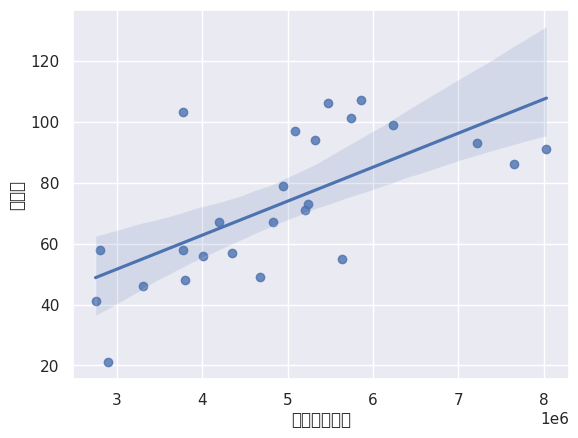

In [68]:
# 노선수, 버스 이용객 수는 상관관계 O
sns.regplot(x='승차총승객수', y='노선수', data = df)
plt.show()

# 버스 이용객 수가 올라가면 노선수가 필요

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()